/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2017-10-09      992.31  0.903681   -0.270352    1151035.0
2017-10-10      987.80  1.667499   -0.753542    1158864.0
2017-10-11     1005.65  1.985951    1.679406    1748443.0
2017-10-12     1005.65  1.042853    0.180308    1521137.0
2017-10-13     1007.87  0.764602   -0.122881    1308881.0
            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2017-08-21      920.87  1.050512   -0.529289    1292624.0   992.31
2017-08-22      940.40  1.705054    1.449901    1711377.0   987.80
2017-08-23      942.58  1.089025    0.595518    1126487.0  1005.65
2017-08-24      936.89  1.672862   -0.722680    1249098.0  1005.65
2017-08-25      930.50  1.142888   -0.927375    1169101.0  1007.87


<IPython.core.display.Javascript object>


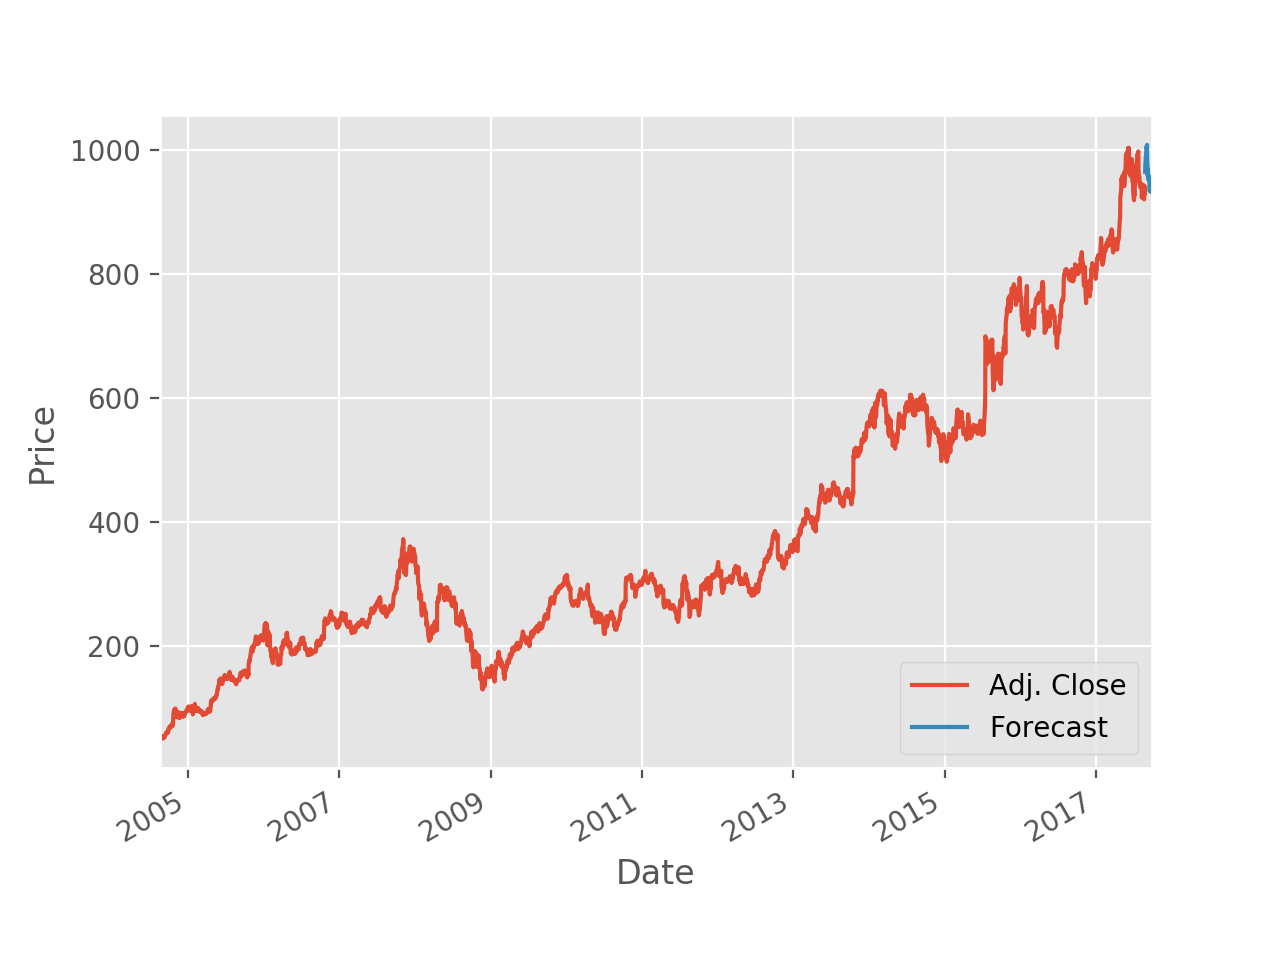

Text(0,0.5,'Price')

In [1]:
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

%matplotlib notebook
##Github Issues Resolved
import warnings

warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="scipy", message="^This module")



df = quandl.get('WIKI/GOOGL')

#print(df.tail())

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

forecast_col = 'Adj. Close' #Label variable

df.fillna(-99999,inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))
print(df.tail())
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
print(df.tail())

##Make X,Y and Split Data
X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X) #Is not used for high-performance applications
X_lately = X[-forecast_out:]
#X = X[:-forecast_out:] DON'T DO THIS
# X = X[:-forecast_out]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

##Initialize a classifier and fit(train) data
clf = LinearRegression(n_jobs = -1) 
#clf = svm.SVR(kernel="poly") Default is linear(citation needed)
clf.fit(X_train,y_train)


##Printing, Testing

accuracy = clf.score(X_test,y_test)
#print(accuracy)
forecast_set = clf.predict(X_lately)
#print(forecast_set)
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
#plt.show()
#print(df.tail())